# Looking at the geometries of tracks (angle, length) - some examples of the analytics

In [179]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [180]:
from CosObs_analysis import *

In [181]:
# get all paths
import glob
smpaths = glob.glob("../output/CosmicObservations/*/*/*/SM-SIF_OBMT_START_*.fits")
smpaths.sort(key = getobmt)

bamobspaths = glob.glob("../output/CosmicObservations/*/*/*/BAM-OBS*_OBMT_START_*.fits")
bamobspaths.sort(key = getobmt)

bamsifpaths = glob.glob("../output/CosmicObservations/*/*/*/BAM-SIF_OBMT_START_*.fits")
bamsifpaths.sort(key = getobmt)

# Choosing source and time ranges

For this example, we consider the tail of the September 2017 flare and compare it with a few days before, when there was no solar activity.

In [182]:
# Load the data

# BAM
bin_AL = 1
bin_AC = 4
pixdepth = 38  # depletion zone depth in mum

## full revolutions in BAM

# big flare tail
GeoDat_flare = CosObs_get_geometries(['../output/CosmicObservations/2017/09/12/BAM-OBS1_OBMT_START_122186884743079104.fits',
         '../output/CosmicObservations/2017/09/12/BAM-OBS1_OBMT_START_122198643945079104.fits'])
GeoDat_quiet = CosObs_get_geometries(sorted(glob.glob('../output/CosmicObservations/2017/09/01/BAM-OBS1*.fits'))[:2])


# quiet time, away from flares
#GeoDat_quiet = CosObs_get_geometries(['../output/CosmicObservations/2017/07/03/BAM-OBS1_OBMT_START_116049958174360704.fits',
#         '../output/CosmicObservations/2017/07/03/BAM-OBS1_OBMT_START_116061717376360704.fits'])

#GeoDat_quiet = CosObs_get_geometries(['../output/CosmicObservations/2017/07/03/BAM-OBS2_OBMT_START_116049958167481104.fits',
#          '../output/CosmicObservations/2017/07/03/BAM-OBS2_OBMT_START_116061717369481104.fits'])



# Sept 2014 flare
#GeoDat_flare = CosObs_get_geometries(sorted(glob.glob('../output/CosmicObservations/2014/09/11/BAM-OBS1*.fits'))[:2])
# before
#GeoDat_quiet = CosObs_get_geometries(sorted(glob.glob('../output/CosmicObservations/2014/09/10/BAM-OBS1*.fits'))[:3])


# always look at full revolutions
geodicts = [GeoDat_quiet, GeoDat_flare]
for geodict in geodicts:
    for k in geodict.keys():
        geodict[k] = geodict[k][:940]



# BAM-SIF
#bin_AL = 1
#bin_AC = 4
#pixdepth = 38  # depletion zone depth in mum
    
#geodict = CosObs_get_geometries(sorted(glob.glob('../output/CosmicObservations/2017/07/*/BAM-SIF*.fits')))



# SM
#bin_AL = 2
#bin_AC = 2
#pixdepth = 12  # depletion zone depth in mum

#geodict = CosObs_get_geometries(sorted(glob.glob('../output/CosmicObservations/2017/07/*/SM-SIF*.fits')))
#geodict = CosObs_get_geometries(sorted(glob.glob('../output/CosmicObservations/2014/09/*/SM-SIF*.fits')))

We can plot the fluxes during quiet time vs those during the flare...

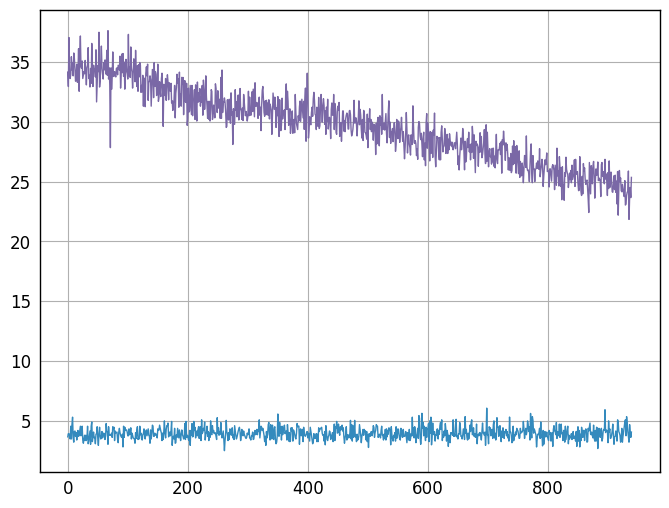

In [183]:
for geodict in geodicts:
    plt.plot(geodict["FLUX"])

# Angles

For the first one, we compare the angular distributions of cosmics during the flare vs outside the flare

In these angluar distributions, cosmics with an uncertainty greater than the width of a bin are split over multiple bins!

The histograms are normalized such that the integral over the distribution with respect to the angle results in the flux of the utilized particles.

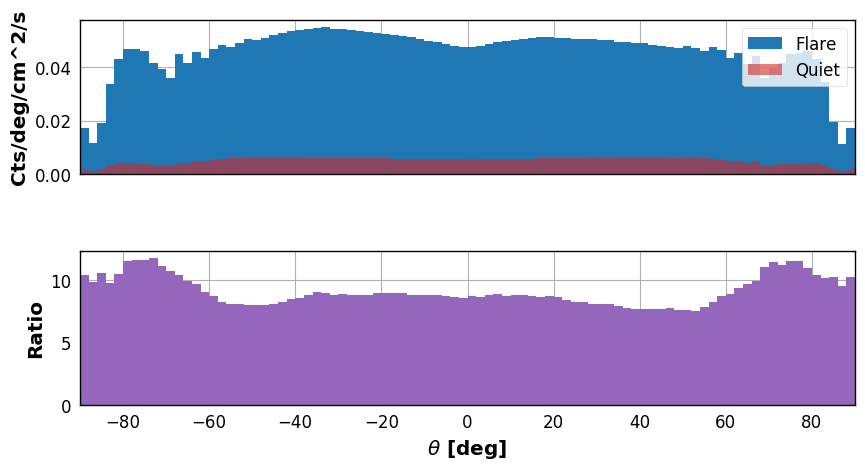

In [184]:
heights_q, bin_lo_q, step_q = spread_thetahist(GeoDat_quiet,90)
heights_f, bin_lo_f, step_f = spread_thetahist(GeoDat_flare,90)

fig,axes = plt.subplots(nrows=2,sharex=True)

axes[0].bar(left=bin_lo_f, height=heights_f, width=step_f,log=False,align='edge',color='tab:blue',label='Flare')
axes[0].bar(left=bin_lo_q, height=heights_q, width=step_q,log=False,align='edge',color='tab:red',alpha=0.6,label='Quiet')
axes[0].legend(loc='upper right')
axes[0].set_ylabel("Cts/deg/cm^2/s")

axes[1].bar(left=bin_lo_f, height=heights_f/heights_q, width=step_f,log=False,align='edge',color='tab:purple')
axes[1].set_ylabel("Ratio")

axes[-1].set_xlabel(r'$\theta$ [deg]')
axes[-1].set_xlim(-90,90)
plt.gcf().set_size_inches(10,5)

Plotting the ratio, we see what appears to be a relative overabundace of steep tracks.

# dE/dx

We can also analyze dE/dx using the track lengths. 

For this purpose, we plot a flux-normalized histogram, without treating uncertainties for now.

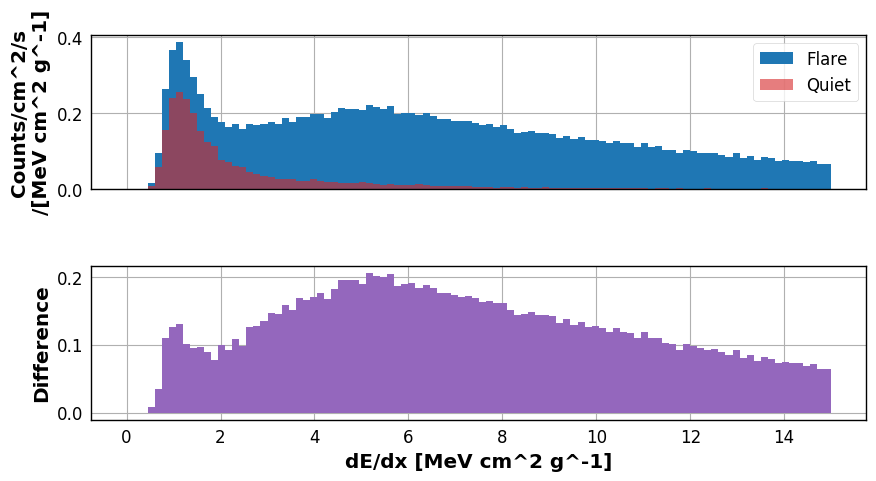

In [186]:
selectors_q = []
selectors_f = []

for ii in range(len(GeoDat_quiet["FLUX"])):
    selectors_q.append(np.array(GeoDat_quiet["THETA"][ii]) == 0)
    
for ii in range(len(GeoDat_flare["FLUX"])):
    selectors_f.append(np.array(GeoDat_flare["THETA"][ii]) == 0)

heights_q, bin_lo_q, step_q = dEhist_fluxnormed(GeoDat_quiet,100,(0,15), selectors_q)
heights_f, bin_lo_f, step_f = dEhist_fluxnormed(GeoDat_flare,100,(0,15), selectors_f)

fig,axes = plt.subplots(nrows=2,sharex=True)

axes[0].bar(left=bin_lo_f, height=heights_f, width=step_f,log=False,align='edge',color='tab:blue',label='Flare')
axes[0].bar(left=bin_lo_q, height=heights_q, width=step_q,log=False,align='edge',color='tab:red',alpha=0.6,label='Quiet')
axes[0].legend(loc='upper right')
axes[0].set_ylabel("Counts/cm^2/s\n/[MeV cm^2 g^-1]")

axes[1].bar(left=bin_lo_f, height=heights_f-heights_q, width=step_f,log=False,align='edge',color='tab:purple')
axes[1].set_ylabel("Difference")

axes[-1].set_xlabel("dE/dx [MeV cm^2 g^-1]")
plt.gcf().set_size_inches(10,5)

Looking at the difference, the additional cosmic rays seen during the flare appear to be of higher dE/dx, and as such, lower energies!

# Miscallaneous histograms

For illustration, we plot some of the data values against each other (quiet time only)

In [172]:
# some flattened values for later
theta = np.array(sum(GeoDat_quiet["THETA"],[]))
sd_theta = np.array(sum(GeoDat_quiet["THETA_ERR"],[]))
length = np.array(sum(GeoDat_quiet["LEN"],[]))
sd_length = np.array(sum(GeoDat_quiet["LEN_ERR"],[]))
energies = np.array(sum(GeoDat_quiet["EN"],[]))

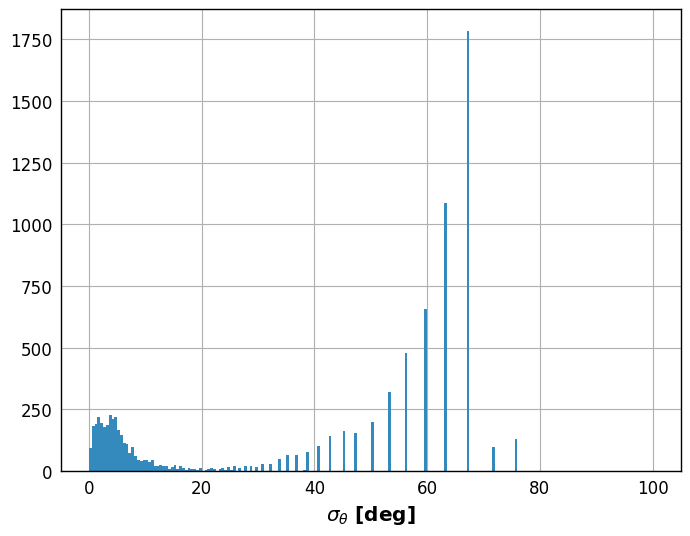

In [107]:
testhist = plt.hist(sd_theta,200,range=(0,100))
plt.xlabel(r'$\sigma_\theta$ [deg]')

Two components here: The high and frequent ones with regular spacing are particles with dim_AC = 1 (manual uncertainty calc.)

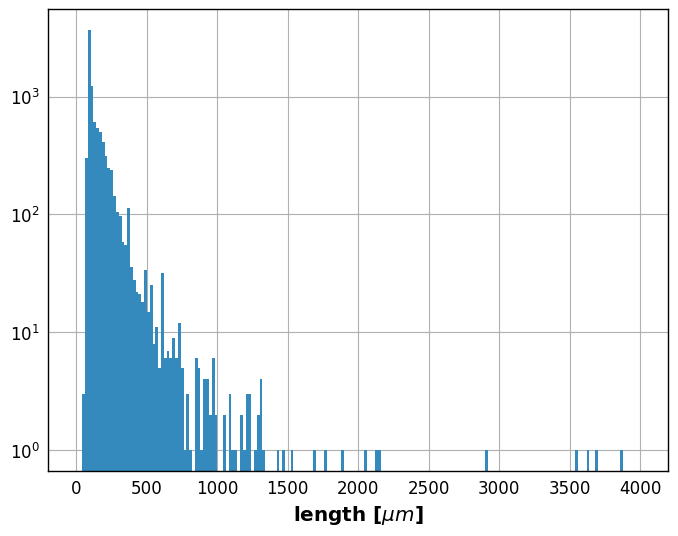

In [108]:
testhist = plt.hist(length, 200,log=True,range=(0,4000))
plt.xlabel(r'length [$\mu m$]')

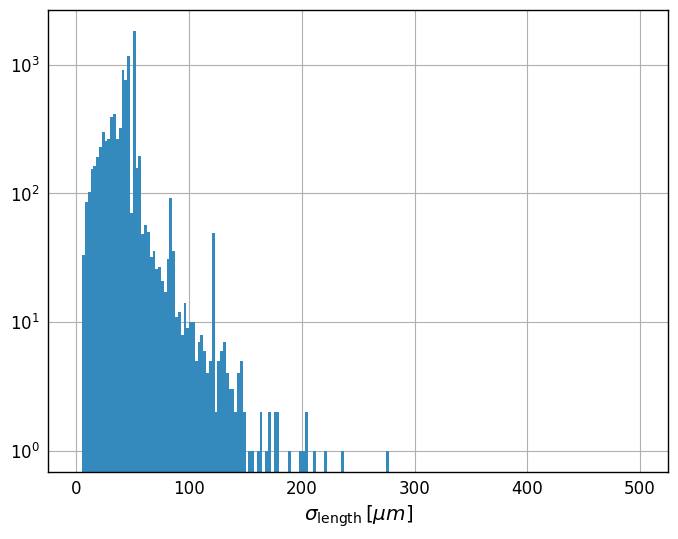

In [109]:
testhist = plt.hist(sd_length, 200,log=True,range=(0,500))
plt.xlabel(r'$\sigma_\mathrm{length} \, [\mu m]$')

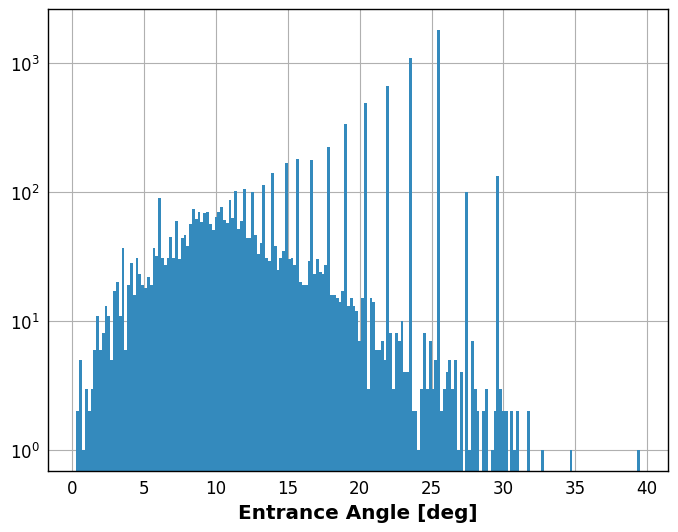

In [110]:
alpha_entr = np.arctan(pixdepth/length)*180/np.pi
athist = plt.hist(alpha_entr, 200,log=True)
plt.xlabel('Entrance Angle [deg]')

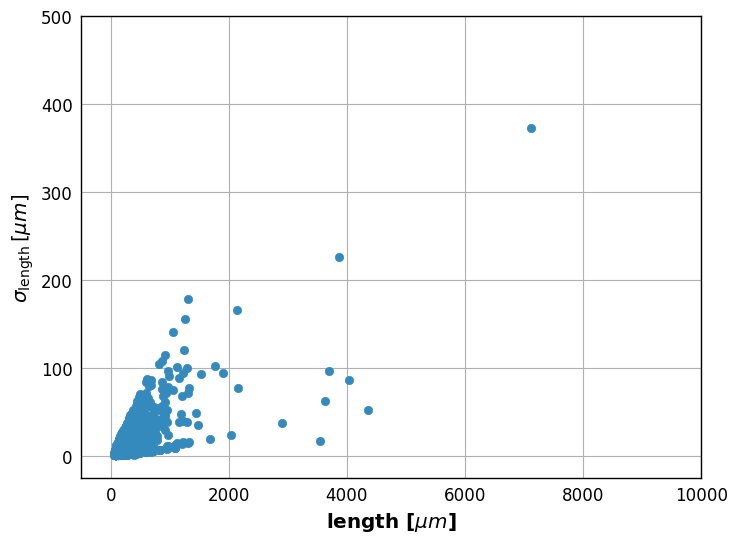

In [111]:
plt.scatter(length,length/sd_length)
plt.ylim((-25,500))
plt.xlim((-500,10000))
plt.xlabel(r'length [$\mu m$]')
plt.ylabel(r'$\sigma_\mathrm{length} \, [\mu m]$')

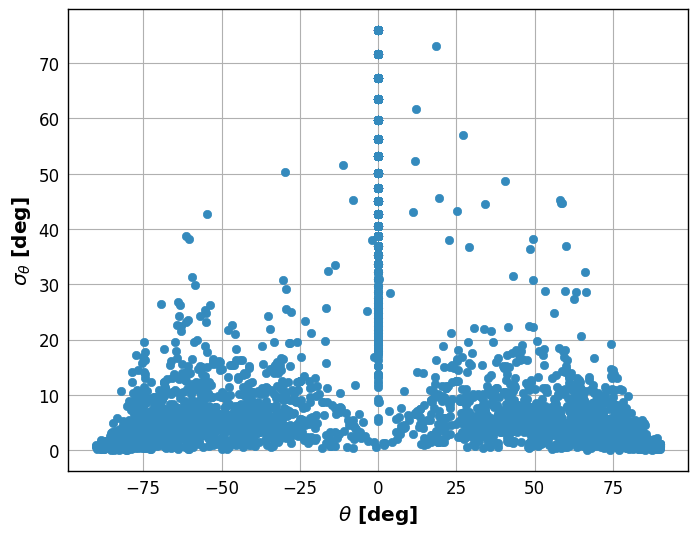

In [112]:
plt.scatter(theta,sd_theta)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\sigma_\theta$ [deg]')
#plt.ylim(-5,95)

# Angular length histogram (Lengths per angle)

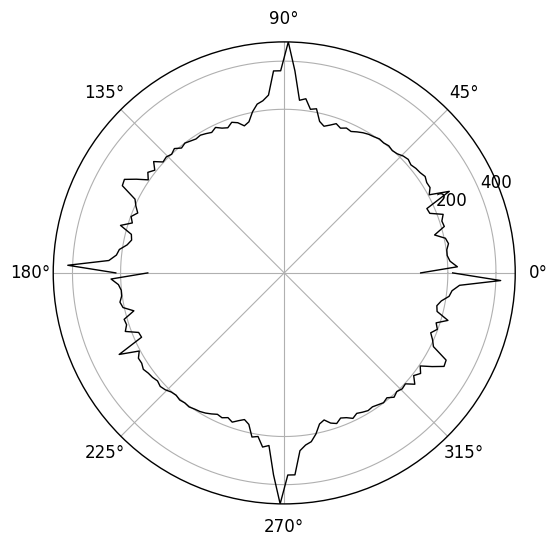

In [187]:
theta_binning = np.copy(theta)
theta_binning[theta<0] += 180

alpha = np.linspace(0,180,90)
da = alpha[1]-alpha[0]
bin_lo = alpha-da/2

medrad = np.zeros(alpha.shape[0])


for ii in range(len(alpha)):
    bin_indices = np.logical_and(theta_binning>=bin_lo[ii], theta_binning<bin_lo[ii]+da)
    # let's also introduce a length filter
    medrad[ii] = np.median((length)[np.logical_and(bin_indices,length>0)])
    # also interesting:
    #medrad[ii] = np.median((length/sd_length)[np.logical_and(bin_indices,length>0)])
    
    
    
#medrad/=pixlen # normalize by length per pixel in that particular direction


# set alpha for plotting
alpha = alpha*np.pi/180
for ii in range(2):
    plt.polar((alpha+ii*np.pi), medrad, color='k')
    

maxrad = np.nanmax(medrad)
minrad = np.nanmin(medrad)

plotrad = np.nanmax(medrad)
plt.xlim((-plotrad,plotrad))
plt.ylim((-plotrad,plotrad))
plt.gca().set_aspect(1)

... makes sense